This notebook explores new constrained time points and we settle on <br> 
Times_constrained = [0, 6, 12, 25, 45,60, 90] for concentrations [10,15,20,25,50,250] pM



In [1]:
import datetime
import numpy as np
import os
import pandas as pd
from collections import defaultdict
import matplotlib.pyplot as plt



In [2]:
#Created a 11/12/2021 
#Last opened 
print(f'Last edited: {datetime.datetime.now()}')

Last edited: 2021-11-17 10:26:10.254285


In [3]:
filepath  = 'Data/IGF/EXP129_RAW.xlsx'
xls = pd.ExcelFile(filepath)
Data_Dict = defaultdict(lambda: 'Not present')
Sheet_labels = ['0pM','10pM','15pm','20pM','25pM', '50pM', '250pM']
nSheets = len(Sheet_labels)
for i in range(nSheets): 
    sl = Sheet_labels[i]
    df = pd.read_excel(xls, sl ,header=None)
    data = df.to_numpy()
    Data_Dict[sl] = data[:,1:]
    print(f'saved {sl} to dictionary')
Time_points = data[:,0]

saved 0pM to dictionary
saved 10pM to dictionary
saved 15pm to dictionary
saved 20pM to dictionary
saved 25pM to dictionary
saved 50pM to dictionary
saved 250pM to dictionary


In [4]:
Time_points

array([  0,   3,   6,   9,  12,  15,  18,  21,  24,  27,  30,  33,  36,
        39,  42,  45,  48,  51,  54,  57,  60,  63,  66,  69,  72,  75,
        78,  81,  84,  87,  90,  93,  96,  99, 102, 105, 108, 111, 114,
       117, 120, 123, 126, 129, 132, 135, 138, 141, 144, 147, 150, 153,
       156, 159, 162, 165, 168, 171, 174, 177, 180])

In [5]:
Means_dict = defaultdict(lambda: 'Not present')
Var_dict = defaultdict(lambda:'Not present')
SecondMoment_dict = defaultdict(lambda:'Not present')
for key in Data_Dict: 
    matrix = Data_Dict[key][:,1:]
    Means_dict[key] = np.mean(matrix, axis = 1)
    SecondMoment_dict[key] = np.mean(matrix**2, axis = 1)
    Var_dict[key] = np.var(matrix, axis = 1)

In [6]:
Means_dict

defaultdict(<function __main__.<lambda>()>,
            {'0pM': array([25453.72575251, 22531.21070234, 24241.45150502, 24136.30100334,
                    24186.72575251, 24086.0367893 , 24106.51170569, 24166.90301003,
                    24217.12040134, 24281.57190635, 24288.66220736, 24356.04682274,
                    24356.64882943, 24433.27090301, 24429.9264214 , 24480.15384615,
                    24511.37458194, 24540.15384615, 24541.05351171, 24561.93979933,
                    24608.58528428, 24604.92307692, 24645.34782609, 24649.11036789,
                    24680.86622074, 24691.97993311, 24669.28093645, 24678.88628763,
                    24697.03010033, 24748.45819398, 24791.45150502, 24779.44147157,
                    24783.94648829, 24792.51170569, 24837.82608696, 24865.71237458,
                    24904.27090301, 24919.55852843, 24935.88294314, 24949.07023411,
                    25016.07023411, 25006.72575251, 25004.60200669, 25026.60535117,
                    25049

Text(0.5, 0, 'time (min)')

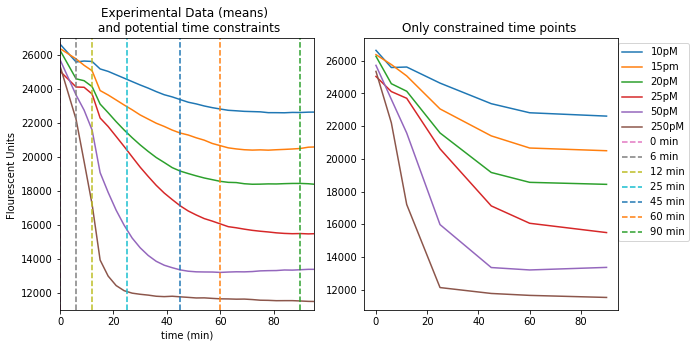

In [70]:
TP_n3 = np.delete(Time_points, 1)
    
TP_arr = [0, 6, 12, 25, 45,60, 90]
nn = 100
lb = 11000

fig, axs = plt.subplots(1,2, figsize = (10,5))

## for the dynamical plot axs[0]

for key in Means_dict: 
#     print(mask)
#     print(mask)
    if key != '0pM':
        arr = np.delete(Means_dict[key], 1) 
        axs[0].plot(TP_n3, arr, label = key)
#         plt.scatter(TP_n3, arr, s = 3)


up = 27000
yarr = np.linspace(11000, 27000, nn)
for minute in TP_arr: 
    va = np.ones(nn)*minute
    axs[0].plot(va, yarr, '--', label = f'{minute} min')
    
axs[0].set_ylim([lb, up])   
axs[0].set_xlim([0,95])
axs[0].legend(bbox_to_anchor = [2.5,1])
axs[0].set_title('Experimental Data (means) \n and potential time constraints')
axs[0].set_xlabel('time (min)')
axs[0].set_ylabel('Flourescent Units ')


## for the plot with only the constrained times 
TP_arr = np.asarray(TP_arr)
idx_list = np.array(TP_arr/3, dtype=int)
for key in Means_dict: 
#     print(mask)
#     print(mask)
    if key != '0pM':
        arr = Means_dict[key][idx_list]
        axs[1].plot(TP_arr, arr, label = key)
#         plt.scatter(TP_n3, arr, s = 3)
axs[1].set_title('Only constrained time points ')
axs[0].set_xlabel('time (min)')
# axs[0].set_ylabel('Flourescent Units ')

array([ 0,  2,  4,  8, 15, 30])